# chapter 8 特殊なデータ加工・可視化10ノック

### ノック91:大容量CSVデータを扱ってみよう

In [1]:
import pandas as pd
df = pd.read_csv('100knock-process-visualization/chapter-8/data/person_count_out_0001_2021011509.csv')
df

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0
...,...,...,...,...,...,...,...,...,...,...
3535,3535,1,2021-01-15 09:59:55.054,2,782,156,0,156,782,0
3536,3536,1,2021-01-15 09:59:56.07,2,782,156,0,156,782,0
3537,3537,1,2021-01-15 09:59:57.085,2,782,156,0,156,782,0
3538,3538,1,2021-01-15 09:59:58.101,2,782,156,0,156,782,0


In [2]:
for df in pd.read_csv('100knock-process-visualization/chapter-8/data/person_count_out_0001_2021011509.csv', chunksize=512):
    print(df.shape)

(512, 10)
(512, 10)
(512, 10)
(512, 10)
(512, 10)
(512, 10)
(468, 10)


In [3]:
i = 0
for df in pd.read_csv('100knock-process-visualization/chapter-8/data/person_count_out_0001_2021011509.csv',chunksize=64):
    df['proceed_per_chunck'] = True
    df.to_csv('100knock-process-visualization/chapter-8/data/processed_big_data.csv', mode='a', index=False, header=i ==0)
    i += 1

In [4]:
df = pd.read_csv('100knock-process-visualization/chapter-8/data/processed_big_data.csv')
df

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2,proceed_per_chunck
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0,True
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0,True
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0,True
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0,True
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0,True
...,...,...,...,...,...,...,...,...,...,...,...
3535,3535,1,2021-01-15 09:59:55.054,2,782,156,0,156,782,0,True
3536,3536,1,2021-01-15 09:59:56.07,2,782,156,0,156,782,0,True
3537,3537,1,2021-01-15 09:59:57.085,2,782,156,0,156,782,0,True
3538,3538,1,2021-01-15 09:59:58.101,2,782,156,0,156,782,0,True


### ノック92: Json形式のファイルを扱ってみよう

In [5]:
pd.read_json('100knock-process-visualization/chapter-8/data/column_oriented.json')

,id,value
0,1,1
1,2,10
2,3,100


In [8]:
pd.read_json('100knock-process-visualization/chapter-8/data/index_oriented.json')

,0,1,2
id,1,2,3
value,1,10,100


In [9]:
pd.read_json('100knock-process-visualization/chapter-8/data/index_oriented.json', orient='index')

,id,value
0,1,1
1,2,10
2,3,100


In [10]:
pd.read_json('100knock-process-visualization/chapter-8/data/table_oriented.json')

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [12]:
pd.read_json('100knock-process-visualization/chapter-8/data/table_oriented.json', orient='table')

,id,value
0,1,1
1,2,10
2,3,100


### ノック93: Webからデータを取得してみよう

In [13]:
import requests
response = requests.get('https://worldtimeapi.org/api/timezone/Asia/Tokyo')
response.content

b'{"abbreviation":"JST","client_ip":"2400:4151:43a1:6b00:ccf7:dc3:c0cc:6e26","datetime":"2021-11-13T15:42:32.937003+09:00","day_of_week":6,"day_of_year":317,"dst":false,"dst_from":null,"dst_offset":0,"dst_until":null,"raw_offset":32400,"timezone":"Asia/Tokyo","unixtime":1636785752,"utc_datetime":"2021-11-13T06:42:32.937003+00:00","utc_offset":"+09:00","week_number":45}'

In [14]:
result = response.json()
result

{'abbreviation': 'JST',
 'client_ip': '2400:4151:43a1:6b00:ccf7:dc3:c0cc:6e26',
 'datetime': '2021-11-13T15:42:32.937003+09:00',
 'day_of_week': 6,
 'day_of_year': 317,
 'dst': False,
 'dst_from': None,
 'dst_offset': 0,
 'dst_until': None,
 'raw_offset': 32400,
 'timezone': 'Asia/Tokyo',
 'unixtime': 1636785752,
 'utc_datetime': '2021-11-13T06:42:32.937003+00:00',
 'utc_offset': '+09:00',
 'week_number': 45}

In [15]:
pd.Series(result)

abbreviation                                       JST
client_ip       2400:4151:43a1:6b00:ccf7:dc3:c0cc:6e26
datetime              2021-11-13T15:42:32.937003+09:00
day_of_week                                          6
day_of_year                                        317
dst                                              False
dst_from                                          None
dst_offset                                           0
dst_until                                         None
raw_offset                                       32400
timezone                                    Asia/Tokyo
unixtime                                    1636785752
utc_datetime          2021-11-13T06:42:32.937003+00:00
utc_offset                                      +09:00
week_number                                         45
dtype: object

In [17]:
import json

with open('100knock-process-visualization/chapter-8/data/response.json', mode='w') as f:
    json.dump(result,f)

In [18]:
import time

for _ in range(4):
    response = requests.get('https://worldtimeapi.org/api/timezone/Asia/Tokyo')
    with open('100knock-process-visualization/chapter-8/data/responses.txt',mode='a') as f:
        res = response.json()
        f.write(f'{json.dumps(res)}\n')
    time.sleep(1)
    

### ノック94:configフィアルを扱ってみよう

In [7]:
import yaml
with open('100knock-process-visualization/chapter-8/config.yml',mode='r') as f:
    config = yaml.load(f)
config

C:\Users\mikam\Anaconda3\envs\100_knocks_2\lib\site-packages\ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


{'dataset': {'name': 'pseudo', 'path': 'data/images_by_py/'}, 'use_gpu': True}

In [10]:
import toml
with open('100knock-process-visualization/chapter-8/config.toml',mode='r') as f:
    config = toml.load(f)
config    

{'use_gpu': True, 'dataset': {'name': 'pseudo', 'path': 'data/images_by_py/'}}

### ノック95:動画ファイルを音声ファイルへ変換してみよう

In [17]:
from IPython.display import Video
Video('100knock-process-visualization/chapter-8/data/sample_video.mp4')

In [14]:
from moviepy.editor import VideoFileClip

video_clip = VideoFileClip('100knock-process-visualization/chapter-8/data/sample_video.mp4')
video_clip.audio.write_audiofile('100knock-process-visualization/chapter-8/data/audio_by_py.mp3')

chunk:  10%|██████▎                                                        | 29/288 [00:00<00:01, 254.15it/s, now=None]

MoviePy - Writing audio in 100knock-process-visualization/chapter-8/data/audio_by_py.mp3


MoviePy - Done.


In [16]:
import IPython.display as disp
disp.Audio('100knock-process-visualization/chapter-8/data/audio_by_py.mp3')

### ノック96:動画ファイルを画像ファイルへ分割してみよう

In [20]:
import cv2
from tqdm import trange
import os

cap = cv2.VideoCapture('100knock-process-visualization/chapter-8/data/sample_video.mp4')
img_dir = '100knock-process-visualization/chapter-8/data/images_by_py/'
os.makedirs(img_dir,exist_ok=1)
n = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for i in trange(n):
    success, img = cap.read()
    if not success:
        continue
    cv2.imwrite(f'{img_dir}/{i:04}.png', img)    

100%|███████████████████████████████████████████████████████████████████████████████| 389/389 [00:03<00:00, 115.90it/s]


### ノック97: PowerPointやWordファイルを読み込んでみよう

In [29]:
# 事前にインストール必要
# conda install -c conda-forge python-pptx, conda install -c conda-forge python-docx

In [30]:
import pptx
pptx_data = pptx.Presentation('100knock-process-visualization/chapter-8/data/サンプル_PowerPoint.pptx')
len(pptx_data.slides)

2

In [31]:
sld_0 = pptx_data.slides[0]
shp_sld_0 = sld_0.shapes
len(shp_sld_0)

3

In [33]:
print(shp_sld_0[0].text)
print(shp_sld_0[0].has_text_frame)

サンプルテキスト Font 18
True


In [35]:
pptx_dadta = pptx.Presentation('100knock-process-visualization/chapter-8/data/サンプル_PowerPoint.pptx')
texts = []
for slide in pptx_data.slides:
    for shape in slide.shapes:
        if shape.has_text_frame:
            texts.append(shape.text)
print(texts)            

['サンプルテキスト Font 18', 'サンプルテキスト\nFont 28', 'サンプル', '２枚目サンプルテキスト Font 18', '２枚目サンプルテキスト\nFont 28', '', '']


In [36]:
import docx
docx_data = docx.Document('100knock-process-visualization/chapter-8/data/サンプル_Word.docx')
len(docx_data.paragraphs)

3

In [37]:
docx_data.paragraphs[0].text

'これは、サンプルテキストです。そして、これが一つめの段落になっています。いろいろ読み込んでいきましょう。'

In [38]:
texts = []
for paragraph in docx_data.paragraphs:
    texts.append(paragraph.text)
print(texts)    

['これは、サンプルテキストです。そして、これが一つめの段落になっています。いろいろ読み込んでいきましょう。', '続いて、これが二つ目の段落になっています。', 'これが三つめの段落です。']


### ノック98: PDFデータを読み込んでみよう

In [2]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter #PDF内のリソース管理,取得したページを解析する
from pdfminer.converter import TextConverter # テキストを取り出す機能
from pdfminer.pdfpage import PDFPage # PDFを1ページずつ取得する
from pdfminer.layout import LAParams # PDFパラメータを保持

In [6]:
pdf_data = open('100knock-process-visualization/chapter-8/data/サンプル_PDF.pdf', 'rb')
txt_file = '100knock-process-visualization/chapter-8/data/サンプル_PDF.txt'
out_data = open(txt_file, mode='w')

rscmgr = PDFResourceManager()
laprms = LAParams()
device = TextConverter(rscmger, out_data, laparams=laprms)
itprtr = PDFPageInterpreter(rscmgr, device)

for page in PDFPage.get_pages(pdf_data):
    itprtr.process_page(page)
    
out_data.close()
device.close()
pdf_data.close()

In [7]:
with open('100knock-process-visualization/chapter-8/data/サンプル_PDF.txt',mode='r') as f:
    content = f.read()
print(content)    

これは、サンプルテキストです。そして、これが一つめの段落になっています。いろいろ

読み込んでいきましょう。 

続いて、これが二つ目の段落になっています。 

これが三つめの段落です。 

 

 

ここから 2 ページ目です。 

2 ページ目二つ目の段落です。 




### ノック99: インタラクティブなグラフを作成してみよう

In [1]:
import pandas as pd
df = pd.read_csv('100knock-process-visualization/chapter-8/data/person_count_out_0001_2021011509.csv')
df.head()

,id,place,receive_time,sensor_num,in1,out1,state1,in2,out2,state2
0,0,1,2021-01-15 09:00:00.144,2,508,73,0,73,508,0
1,1,1,2021-01-15 09:00:01.146,2,508,73,0,73,508,0
2,2,1,2021-01-15 09:00:02.161,2,508,73,0,73,508,0
3,3,1,2021-01-15 09:00:03.176,2,508,73,0,73,508,0
4,4,1,2021-01-15 09:00:04.192,2,508,73,0,73,508,0


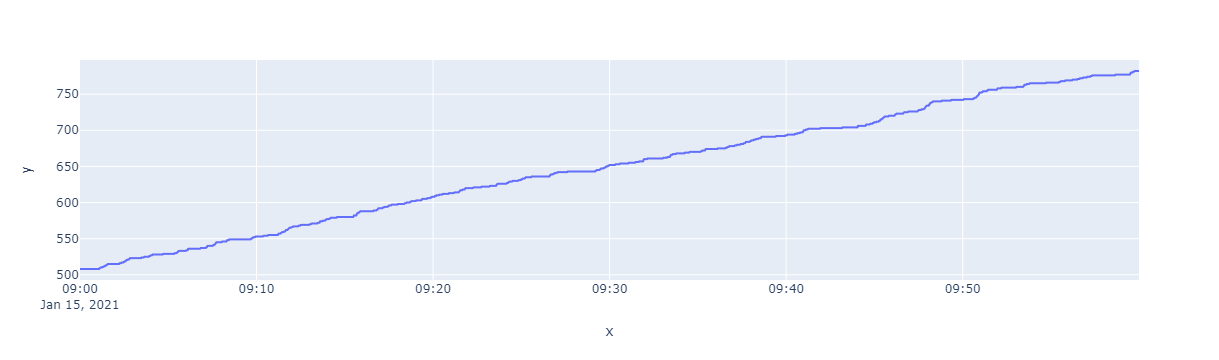

In [10]:
# https://morinokabu.com/2021/10/02/jupyter-lab_plotly/を参考にinstall
"""
まずNode.jsをインストール
コマンドプロンプトで以下を実行していく
conda install -c plotly plotly=4.8.2
pip install jupyterlab "ipywidgets>=7.5"
jupyter labextension install jupyterlab-plotly@4.8.2
jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.8.2
最後にjupyter labを再起動する
"""



import plotly.express as px
fig = px.line(x=df['receive_time'], y=df['in1'])
fig.show();

In [6]:
df_v = pd.melt(df[['receive_time','in1','out1']], id_vars=['receive_time'], var_name='変数名', value_name='値')
df_v.head()

,receive_time,変数名,値
0,2021-01-15 09:00:00.144,in1,508
1,2021-01-15 09:00:01.146,in1,508
2,2021-01-15 09:00:02.161,in1,508
3,2021-01-15 09:00:03.176,in1,508
4,2021-01-15 09:00:04.192,in1,508


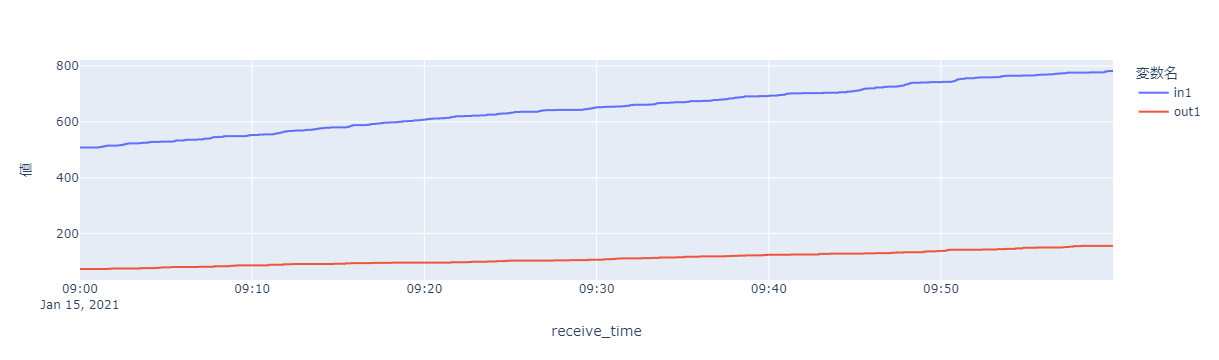

In [7]:
fig = px.line(df_v, x='receive_time', y='値', color='変数名')
fig.show()

### ノック100: 3次元グラフを作成してみよう

In [11]:
import seaborn as sns
df_iris = sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


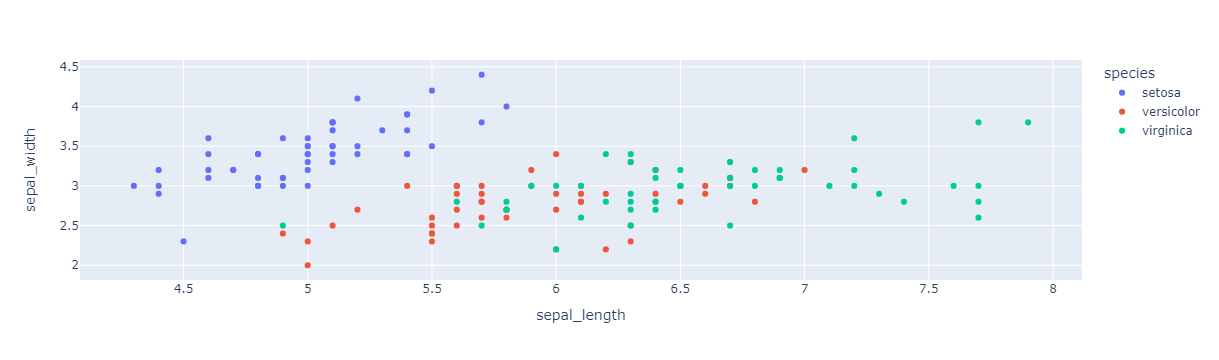

In [13]:
fig = px.scatter(df_iris, x='sepal_length', y='sepal_width', color='species')
fig.show()

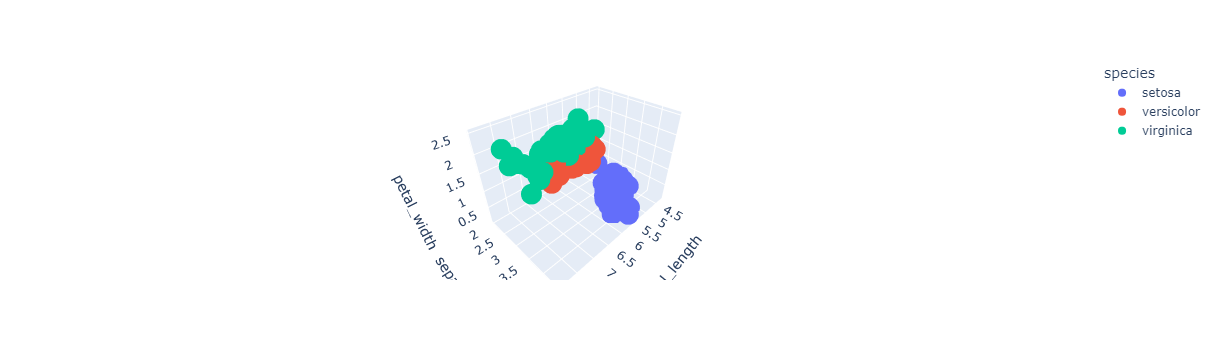

In [14]:
fig = px.scatter_3d(df_iris, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig.show()